In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1.First, you must import the cartwheel data from the path given above
df = pd.read_csv(
    "C:/Users/eli/Desktop/Cartwheeldata.csv")

In [7]:
# 2.Next, look at the 'head' of our DataFrame 'df'
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


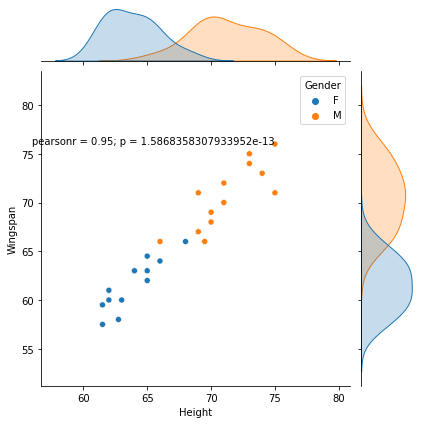

In [8]:
# 3.Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)
scater = sns.jointplot(x=df["Height"], y=df["Wingspan"], hue=df["Gender"])
df_no_nulls = df[["Height", "Wingspan"]].dropna()
pearsonr, p = stats.pearsonr(df_no_nulls.Height, df_no_nulls.Wingspan)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'

scater.ax_joint.text(
    scater.ax_joint._axes.xaxis.get_data_interval()[1],
    scater.ax_joint._axes.yaxis.get_data_interval()[1],
    pearson_str,
    horizontalalignment='right')
plt.show()

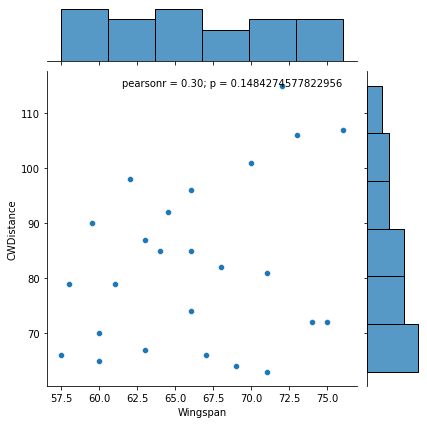

In [9]:
# 4.Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
sc = sns.jointplot(x=df["Wingspan"], y=df["CWDistance"])
df_no_nulls = df[["Wingspan", "CWDistance"]].dropna()
pearsonr, p = stats.pearsonr(df_no_nulls.Wingspan, df_no_nulls.CWDistance)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'

sc.ax_joint.text(
    sc.ax_joint._axes.xaxis.get_data_interval()[1],
    sc.ax_joint._axes.yaxis.get_data_interval()[1],
    pearson_str,
    horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='Wingspan', ylabel='CWDistance'>

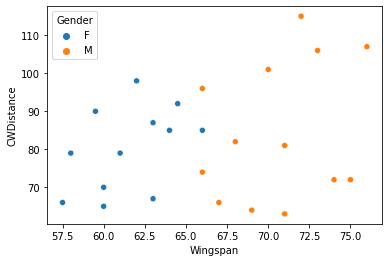

In [10]:
# 5.Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
sns.scatterplot(data=df, x=df["Wingspan"],
                y=df["CWDistance"], hue=df["Gender"])

<AxesSubplot:xlabel='Glasses', ylabel='CWDistance'>

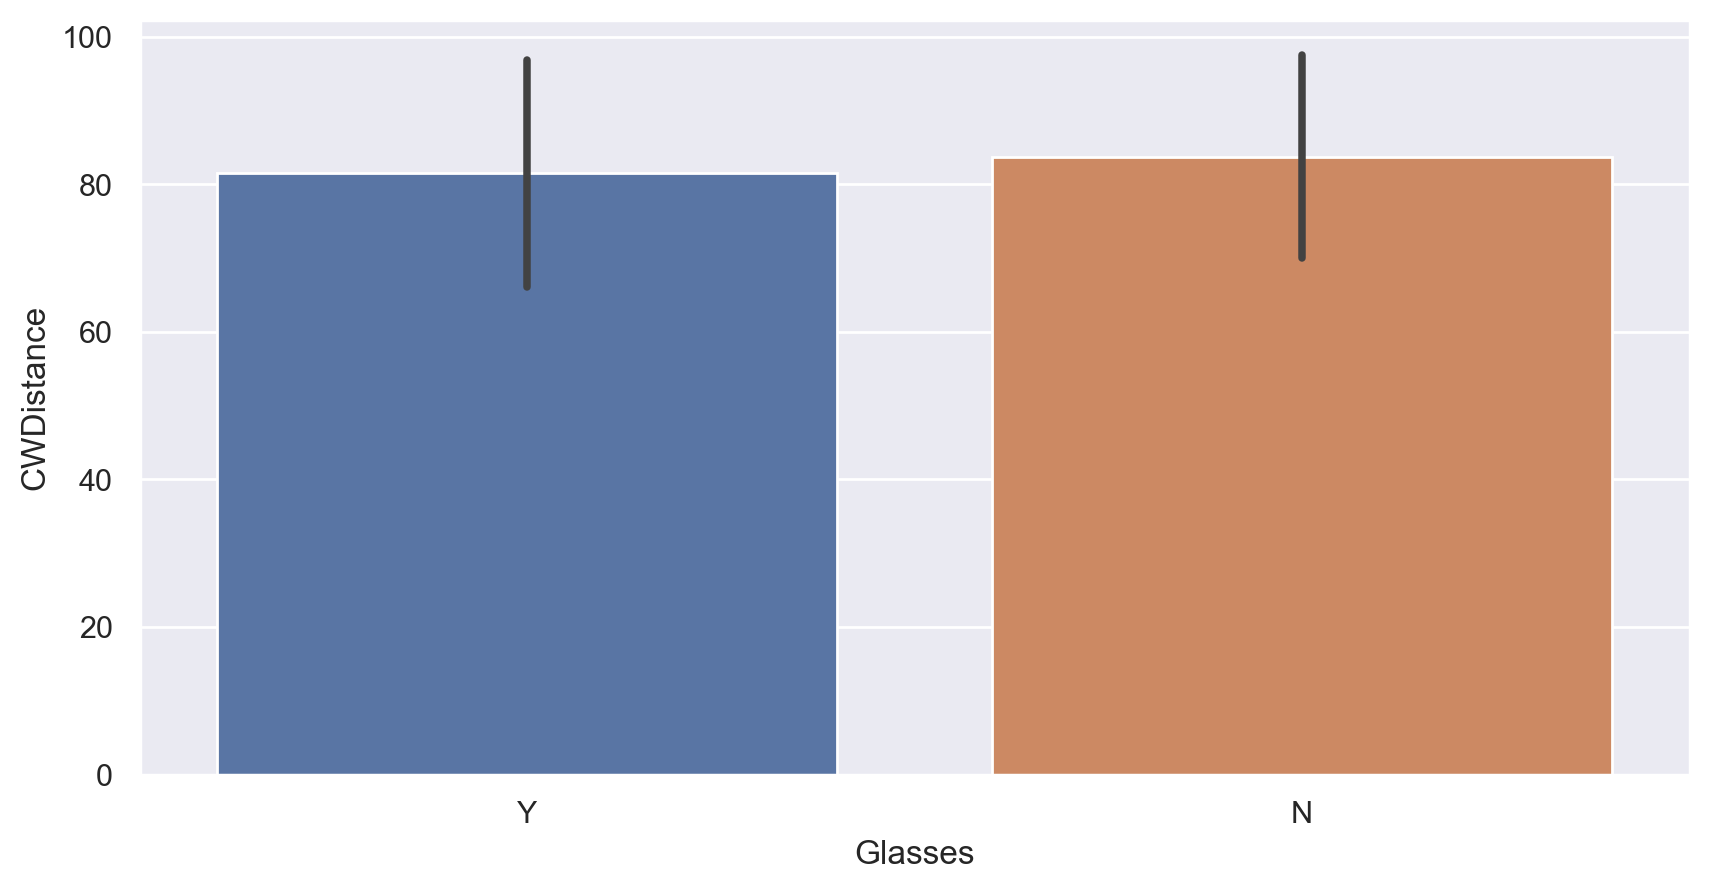

In [11]:
# 6.Make a Seaborn barplot with x = glasses and y = cartwheel distance
sns.set(style='darkgrid')
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(data=df, x="Glasses", y="CWDistance", estimator=np.mean, ci='sd')

<AxesSubplot:xlabel='Glasses', ylabel='CWDistance'>

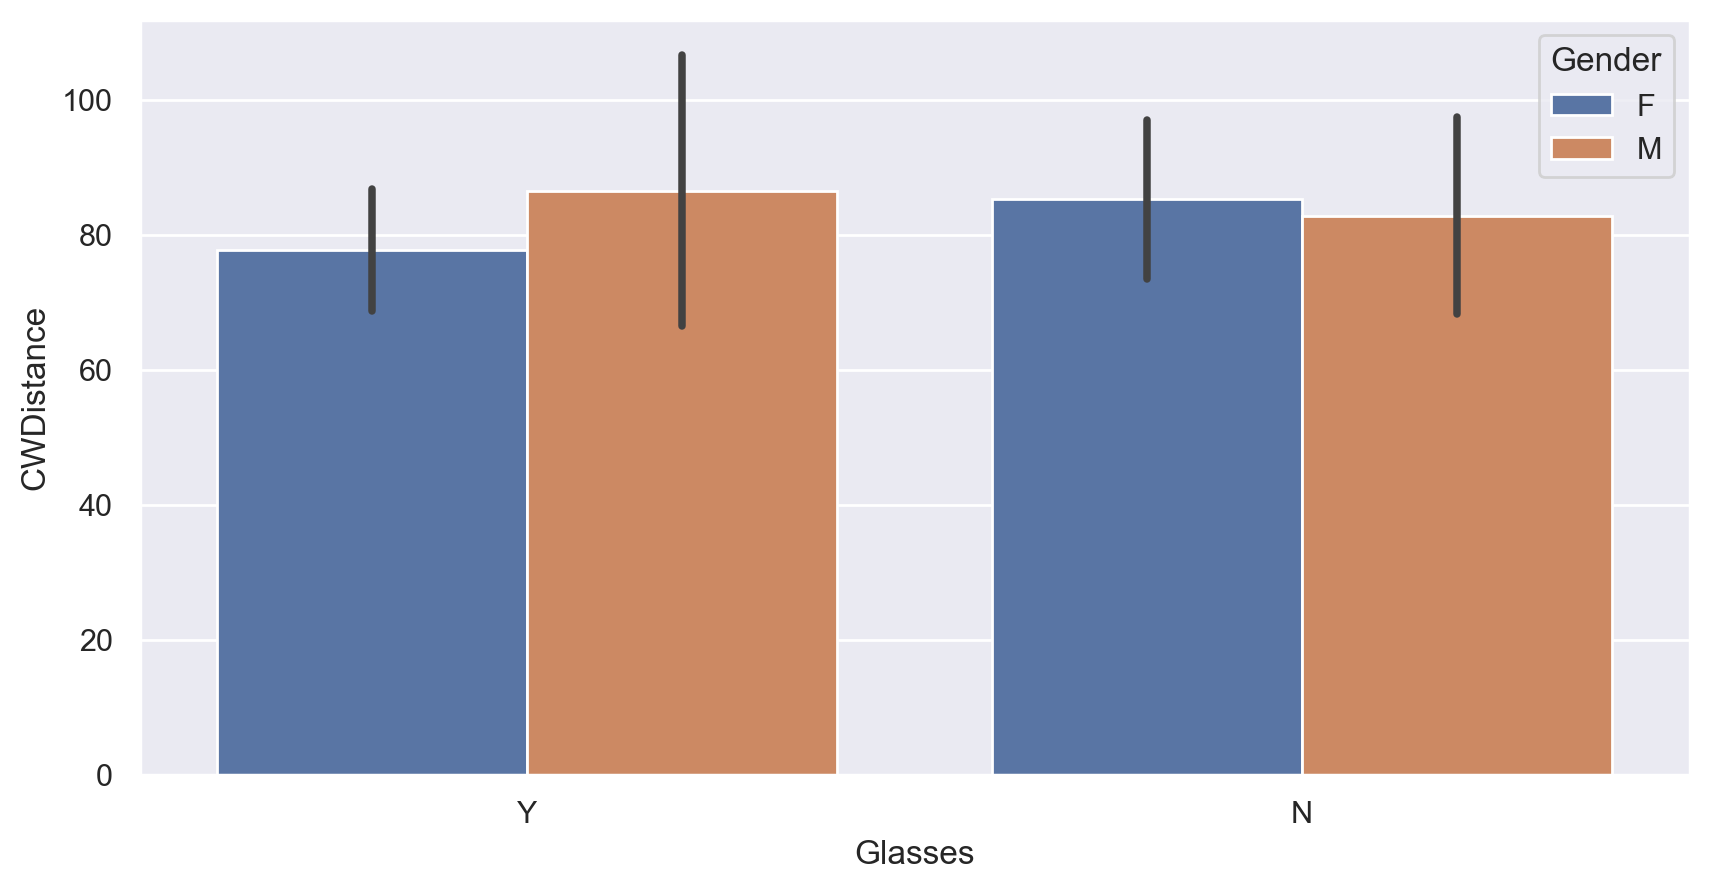

In [12]:
# 7.Make the same Seaborn boxplot as above, but include gender for the hue argument
sns.set(style='darkgrid')
plt.figure(figsize=(10, 5), dpi=200)
sns.barplot(data=df, x="Glasses", y="CWDistance",
            estimator=np.mean, ci='sd', hue=df["Gender"])